In [ ]:
# importamos las librerias necesarias
#tensorflow_version 2.x
import tensorflow as tf

#%pip install mitdeeplearning 
import mitdeeplearning as mdl
import random
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
#assert len(tf.config.list_physical_devices('GPU')) > 0

Note: you may need to restart the kernel to use updated packages.


In [16]:
#importamos los datos
#from google.colab import drive
#drive.mount('/content/drive')

#Triangulos
a1=np.load(r"C:\Users\GERSONSANCHEZ\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Documents\2023-1\TRATAMIENTO DE SEñALES DISCRETAS O1\proyecto-discretas\pruebastriangulo\triangulo1.npy")
a2=np.load(r"C:\Users\GERSONSANCHEZ\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Documents\2023-1\TRATAMIENTO DE SEñALES DISCRETAS O1\proyecto-discretas\pruebastriangulo\triangulo2.npy")
a3=np.load(r"C:\Users\GERSONSANCHEZ\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Documents\2023-1\TRATAMIENTO DE SEñALES DISCRETAS O1\proyecto-discretas\pruebastriangulo\triangulo3.npy")
a4=np.load(r"C:\Users\GERSONSANCHEZ\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Documents\2023-1\TRATAMIENTO DE SEñALES DISCRETAS O1\proyecto-discretas\pruebastriangulo\triangulo4.npy")
a5=np.load(r"C:\Users\GERSONSANCHEZ\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Documents\2023-1\TRATAMIENTO DE SEñALES DISCRETAS O1\proyecto-discretas\pruebastriangulo\triangulo5.npy")

#Circulos
a6=np.load(r'C:\Users\GERSONSANCHEZ\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Documents\2023-1\TRATAMIENTO DE SEñALES DISCRETAS O1\proyecto-discretas\pruebascirculo\circulos1.npy')
a7=np.load(r'C:\Users\GERSONSANCHEZ\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Documents\2023-1\TRATAMIENTO DE SEñALES DISCRETAS O1\proyecto-discretas\pruebascirculo\circulos2.npy')
a8=np.load(r'C:\Users\GERSONSANCHEZ\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Documents\2023-1\TRATAMIENTO DE SEñALES DISCRETAS O1\proyecto-discretas\pruebascirculo\circulos3.npy')
a9=np.load(r'C:\Users\GERSONSANCHEZ\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Documents\2023-1\TRATAMIENTO DE SEñALES DISCRETAS O1\proyecto-discretas\pruebascirculo\circulos4.npy')
a10=np.load(r'C:\Users\GERSONSANCHEZ\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Documents\2023-1\TRATAMIENTO DE SEñALES DISCRETAS O1\proyecto-discretas\pruebascirculo\circulos5.npy')

#Rectangulos
a11=np.load(r'C:\Users\GERSONSANCHEZ\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Documents\2023-1\TRATAMIENTO DE SEñALES DISCRETAS O1\proyecto-discretas\pruebascuadrado\rectangulo1.npy')
a12=np.load(r'C:\Users\GERSONSANCHEZ\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Documents\2023-1\TRATAMIENTO DE SEñALES DISCRETAS O1\proyecto-discretas\pruebascuadrado\rectangulo2.npy')
a13=np.load(r'C:\Users\GERSONSANCHEZ\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Documents\2023-1\TRATAMIENTO DE SEñALES DISCRETAS O1\proyecto-discretas\pruebascuadrado\rectangulo3.npy')
a14=np.load(r'C:\Users\GERSONSANCHEZ\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Documents\2023-1\TRATAMIENTO DE SEñALES DISCRETAS O1\proyecto-discretas\pruebascuadrado\rectangulo4.npy')
a15=np.load(r'C:\Users\GERSONSANCHEZ\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Documents\2023-1\TRATAMIENTO DE SEñALES DISCRETAS O1\proyecto-discretas\pruebascuadrado\rectangulo5.npy')


#Unimos los radargramas de entrenamiento
train_images=np.append(a1,a2)
train_images=np.append(train_images,a3)
train_images=np.append(train_images,a4)
train_images=np.append(train_images,a6)
train_images=np.append(train_images,a7)
train_images=np.append(train_images,a8)
train_images=np.append(train_images,a9)
train_images=np.append(train_images,a11)
train_images=np.append(train_images,a12)
train_images=np.append(train_images,a13)
train_images=np.append(train_images,a14)

#Unimos los radargramas de prueba
test_images=np.append(a5,a10)
test_images=np.append(test_images,a15)

(2400, 200, 200, 1)
(2400, 200, 200)
(600, 200, 200)


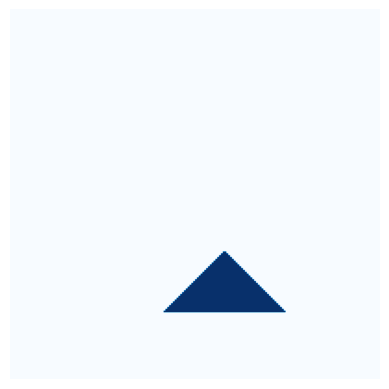

"for i in range(600):\n  plt.imshow(test_images[i,:,:], cmap='Blues')\n  plt.axis('off')\n  plt.show()"

In [22]:
print(train_images.shape)
train_images=train_images.reshape(2400,200,200)
test_images=test_images.reshape(600,200,200)
print(train_images.shape)
print(test_images.shape)
plt.imshow(test_images[10,:,:], cmap='Blues')
plt.axis('off')
plt.show()
'''for i in range(600):
  plt.imshow(test_images[i,:,:], cmap='Blues')
  plt.axis('off')
  plt.show()'''

In [23]:
#Etiquetamos el entrenamiento
a1=np.zeros(800)
b1=np.ones(800)
c1=np.full(800,2)
train_labels = np.append(a1,b1)
train_labels = np.append(train_labels,c1)
#Etiquetamos las pruebas

a5=np.zeros(200)
b5=np.ones(200)
c5=np.full(200,2)
test_labels= np.append(a5,b5)
test_labels= np.append(test_labels,c5)

print(train_labels.shape, test_labels.shape)
print(train_labels)

(2400,) (600,)
[0. 0. 0. ... 2. 2. 2.]


In [19]:
# se agrega una dimension extra a utilizar posteriormente
#train_x=np.expand_dims(train_x, axis=3)
#test_x=np.expand_dims(test_x, axis=3)
#print(train_x.shape)
#print(test_x.shape)

In [20]:
# Normalizar los radriargramas
for i in range(0,2400):
  train_images[i]= train_images[i]/abs(np.max(train_images[i]))
for i in range(0,600):
  test_images[i]= test_images[i]/abs(np.max(test_images[i]))
print(train_images.shape)
print(test_images.shape)

(2400, 200, 200)
(600, 200, 200)


In [21]:
#Para hacerle el resize
print(train_images[10,:,:].shape)
train_images=np.resize(train_images,(2400,200,200,1))
print(train_images.shape)
print(train_images[10,:,:,:].shape)

test_images=np.resize(test_images,(600,200,200,1))
print(test_images.shape)

(200, 200)
(2400, 200, 200, 1)
(200, 200, 1)
(600, 200, 200, 1)


In [24]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
          # Definimos la primera capa de convolucion
          tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation=tf.nn.relu, input_shape=(200,200,1)),
          # Definimos la primera capa donde extraemos la informacion mas importante
          tf.keras.layers.MaxPool2D(pool_size=(3, 3)),
          # Definimos la segunda capa de convolucion
          tf.keras.layers.Conv2D(filters=28, kernel_size=(3,3), activation=tf.nn.relu),
          # Definimos la segunda capa donde extraemos la informacion mas importante
          tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
          # aplanamos
          tf.keras.layers.Flatten(),
          #Definimos la primera capa totalmente conectadas
          tf.keras.layers.Dense(140, activation=tf.nn.relu),
          #Definimos la segunda capa totalmente conectadas
          tf.keras.layers.Dense(90, activation=tf.nn.relu),
          #Definimos la tercera capa totalmente conectadas
          tf.keras.layers.Dense(45, activation=tf.nn.relu),
          tf.keras.layers.Dense(3, activation=tf.nn.softmax)
      ])

    return cnn_model
cnn_model = build_cnn_model()
cnn_model.predict(train_images[[0]])
print(cnn_model.summary())

: 

: 

In [ ]:
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

BATCH_SIZE = 20
EPOCHS = 100

cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/100
120/120 [==============================] - 37s 306ms/step - loss: 1.0822 - accuracy: 0.3850
Epoch 2/100
120/120 [==============================] - 34s 287ms/step - loss: 1.0508 - accuracy: 0.3758
Epoch 3/100
120/120 [==============================] - 36s 300ms/step - loss: 1.0208 - accuracy: 0.3629
Epoch 4/100
120/120 [==============================] - 36s 302ms/step - loss: 0.9968 - accuracy: 0.3608
Epoch 5/100
120/120 [==============================] - 36s 297ms/step - loss: 0.9766 - accuracy: 0.3604
Epoch 6/100
120/120 [==============================] - 36s 301ms/step - loss: 0.9585 - accuracy: 0.3654
Epoch 7/100
120/120 [==============================] - 36s 303ms/step - loss: 0.9416 - accuracy: 0.3725
Epoch 8/100
120/120 [==============================] - 41s 343ms/step - loss: 0.9250 - accuracy: 0.3817
Epoch 9/100
120/120 [==============================] - 38s 319ms/step - loss: 0.9088 - accuracy: 0.3971
Epoch 10/100
120/120 [==============================] - 39s 326m

In [ ]:
test_loss, test_acc =  cnn_model.evaluate(test_images,test_labels)
print(test_labels)

print('Test accuracy:', test_acc)

19/19 [==============================] - 3s 142ms/step - loss: 0.0806 - accuracy: 0.9900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [ ]:
predictions = cnn_model.predict(test_images)
a=random.randint(0,600)
predictions[a]
prediction = np.argmax(predictions[a])
print(prediction)
print("Label of this digit is:", test_labels[a])
plt.imshow(test_images[a,:,:,0], cmap='Blues')
plt.axis('off')

NameError: ignored